In [69]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

In [70]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

In [71]:
tf.__version__

'2.0.0-dev20190315'

In [72]:
from sklearn.utils import shuffle

In [73]:
M = 2 # 入力データの次元数
K = 3 # クラス数
n = 100 # クラスごとのデータ数
N = n * K # 全データ数

In [74]:
X1 = np.random.randn(n, M) +  np.array([0, 10])
X2 = np.random.randn(n, M) +  np.array([5, 5])
X3 = np.random.randn(n, M) +  np.array([10, 0])
X1.shape

(100, 2)

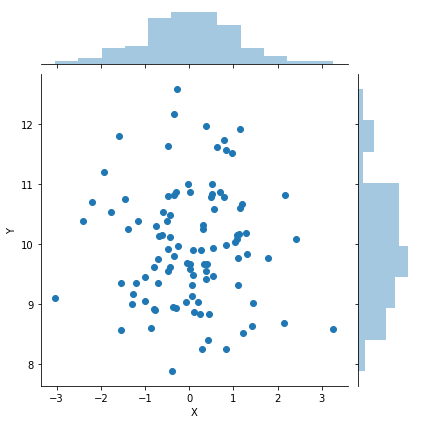

In [75]:
df = pd.DataFrame(X1, columns=['X', 'Y'])
sns.jointplot(x='X', y='Y', data=df)

In [76]:
Y1 = np.array([[1, 0, 0] for i in range(n)]) 
Y2 = np.array([[0, 1, 0] for i in range(n)]) 
Y3 = np.array([[0, 0, 1] for i in range(n)]) 
Y1.shape

(100, 3)

In [77]:
X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)
X.shape
Y.shape

(300, 2)

(300, 3)

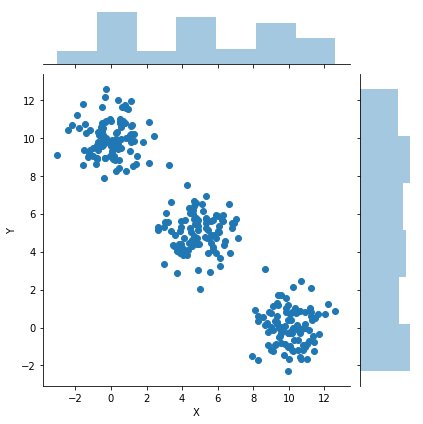

In [78]:
df = pd.DataFrame(X, columns=['X', 'Y'])
sns.jointplot(x='X', y='Y', data=df)

In [79]:
batch_size = 50
n_batches = N

In [80]:
model = Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))
model

In [81]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(lr=0.1)
)
model

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X, Y, epochs=20, batch_size=batch_size)

Epoch 1/20
300/300 [==============================] - 0s 228us/sample - loss: 3.8903
Epoch 2/20
300/300 [==============================] - 0s 30us/sample - loss: 0.2809
Epoch 3/20
300/300 [==============================] - 0s 39us/sample - loss: 0.1809
Epoch 4/20
300/300 [==============================] - 0s 40us/sample - loss: 0.1379
Epoch 5/20
300/300 [==============================] - 0s 53us/sample - loss: 0.1120
Epoch 6/20
300/300 [==============================] - 0s 53us/sample - loss: 0.0957
Epoch 7/20
300/300 [==============================] - 0s 51us/sample - loss: 0.0847
Epoch 8/20
300/300 [==============================] - 0s 50us/sample - loss: 0.0752
Epoch 9/20
300/300 [==============================] - 0s 42us/sample - loss: 0.0688
Epoch 10/20
300/300 [==============================] - 0s 46us/sample - loss: 0.0632
Epoch 11/20
300/300 [==============================] - 0s 50us/sample - loss: 0.0588
Epoch 12/20
300/300 [==============================] - 0s 43us/sample - l

In [84]:
X_, Y_ = shuffle(X, Y)
X_, Y_

(array([[-3.37063566e-02,  1.09980457e+01],
        [ 1.03105935e+01, -6.48267484e-01],
        [ 9.55297777e+00, -8.37642290e-01],
        [ 6.31583248e+00,  5.91713991e+00],
        [ 2.15866171e+00,  1.08254770e+01],
        [ 9.58630419e+00,  4.44552126e-02],
        [ 2.15381034e+00,  8.68707384e+00],
        [ 6.71196972e+00,  3.94990792e+00],
        [ 4.89157424e+00,  5.15954266e+00],
        [ 4.06788691e+00,  4.12405118e+00],
        [ 4.48144599e+00,  5.02829096e+00],
        [-1.92631182e+00,  1.12121491e+01],
        [-8.06017286e-01,  8.92750322e+00],
        [ 4.78776034e+00,  5.78484623e+00],
        [ 8.98780421e+00,  4.74846050e-02],
        [ 5.44779419e+00,  3.92327773e+00],
        [ 4.84018312e+00,  4.73179067e+00],
        [ 9.02476637e+00,  7.76228774e-01],
        [-4.69647591e-01,  9.91921334e+00],
        [ 4.58952906e+00,  6.18044938e+00],
        [ 5.89380295e+00,  3.95383648e+00],
        [ 1.09926493e+00,  9.77553990e+00],
        [ 3.25891386e+00,  8.584

In [85]:
classes = model.predict_classes(X_[0:10], batch_size=batch_size)
classes

array([0, 2, 2, 1, 0, 2, 0, 1, 1, 1])

In [86]:
prod = model.predict_proba(X_[0:10], batch_size=1)
prod.shape
prod

(10, 3)

array([[9.95873153e-01, 4.12683422e-03, 1.38559919e-09],
       [1.08634879e-09, 2.58085015e-03, 9.97419119e-01],
       [3.21245164e-09, 2.99285026e-03, 9.97007191e-01],
       [2.93660257e-03, 9.89217758e-01, 7.84555729e-03],
       [9.17078495e-01, 8.29213709e-02, 1.11050596e-07],
       [1.52221524e-08, 9.39040259e-03, 9.90609586e-01],
       [7.85867453e-01, 2.14127615e-01, 4.84785096e-06],
       [5.49794873e-04, 8.82872343e-01, 1.16577826e-01],
       [1.36750164e-02, 9.76359248e-01, 9.96579323e-03],
       [2.39688419e-02, 9.51261342e-01, 2.47697365e-02]], dtype=float32)